In [2]:
import pandas as pd
import seaborn as sns

In [3]:
raw_csv_data = pd.read_csv("Absenteeism_data.csv")
raw_csv_data.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [4]:
df = raw_csv_data.copy()

In [5]:
df.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [6]:
df.columns

Index(['ID', 'Reason for Absence', 'Date', 'Transportation Expense',
       'Distance to Work', 'Age', 'Daily Work Load Average', 'Body Mass Index',
       'Education', 'Children', 'Pets', 'Absenteeism Time in Hours'],
      dtype='object')

In [7]:
df.isnull().sum()

ID                           0
Reason for Absence           0
Date                         0
Transportation Expense       0
Distance to Work             0
Age                          0
Daily Work Load Average      0
Body Mass Index              0
Education                    0
Children                     0
Pets                         0
Absenteeism Time in Hours    0
dtype: int64

In [8]:
df.dtypes

ID                             int64
Reason for Absence             int64
Date                          object
Transportation Expense         int64
Distance to Work               int64
Age                            int64
Daily Work Load Average      float64
Body Mass Index                int64
Education                      int64
Children                       int64
Pets                           int64
Absenteeism Time in Hours      int64
dtype: object

In [9]:
df.drop('ID', axis=1, inplace=True)
df.head()

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [10]:
df['Reason for Absence'].unique()

array([26,  0, 23,  7, 22, 19,  1, 11, 14, 21, 10, 13, 28, 18, 25, 24,  6,
       27, 17,  8, 12,  5,  9, 15,  4,  3,  2, 16])

In [11]:
print("Number  of unique values in each column:")

for colname in df.columns:
    unique = df[colname].unique()
    print(colname, len(unique), sep=":-    ")

Number  of unique values in each column:
Reason for Absence:-    28
Date:-    432
Transportation Expense:-    24
Distance to Work:-    24
Age:-    21
Daily Work Load Average:-    35
Body Mass Index:-    16
Education:-    4
Children:-    5
Pets:-    6
Absenteeism Time in Hours:-    19


In [12]:
df.head()

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [13]:
unique_vals = df['Reason for Absence'].unique().tolist()

In [14]:
sorted(unique_vals)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28]

Reason no. 20 is missing

In [15]:
df['Reason for Absence'].value_counts()

Reason for Absence
23    147
28    110
27     66
13     52
0      38
19     36
22     32
26     31
25     29
11     24
10     22
18     21
14     18
1      16
7      13
12      8
21      6
6       6
8       5
9       4
5       3
24      3
16      3
15      2
4       2
17      1
3       1
2       1
Name: count, dtype: int64

Reason no. 23 occured the most.

In [16]:
# creating dummies for this column
reason_dummies = pd.get_dummies(df['Reason for Absence'], drop_first=True).astype(int)
reason_dummies.head()

,1,2,3,4,5,6,7,8,9,10,...,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [17]:
# Hanlding categorization of reasons in reason_dummies i.e.
# reason 1 - 14: 1
# reason 15 - 17: 2
# reason 18 - 21: 3
# reason 22 - 28: 4

reason_1 = reason_dummies.iloc[:, :14].max(axis=1)
reason_2 = reason_dummies.iloc[:, 14:17].max(axis=1)
reason_3 = reason_dummies.iloc[:, 17:20].max(axis=1)
reason_4 = reason_dummies.iloc[:, 20:28].max(axis=1)

In [18]:
# print(reason_1.head())
# print(reason_2.head())
# print(reason_3.head())
print(reason_4.head())

0    1
1    0
2    1
3    0
4    1
dtype: int64


In [19]:
df = pd.concat([df, reason_1, reason_2, reason_3, reason_4], axis=1)
df.head()

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,0,1,2,3
0,26,07/07/2015,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,0,14/07/2015,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,23,15/07/2015,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,7,16/07/2015,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,23,23/07/2015,289,36,33,239.554,30,1,2,1,2,0,0,0,1


In [20]:
df.columns

Index([       'Reason for Absence',                      'Date',
          'Transportation Expense',          'Distance to Work',
                             'Age',   'Daily Work Load Average',
                 'Body Mass Index',                 'Education',
                        'Children',                      'Pets',
       'Absenteeism Time in Hours',                           0,
                                 1,                           2,
                                 3],
      dtype='object')

In [21]:
df.columns[:-4]

Index(['Reason for Absence', 'Date', 'Transportation Expense',
       'Distance to Work', 'Age', 'Daily Work Load Average', 'Body Mass Index',
       'Education', 'Children', 'Pets', 'Absenteeism Time in Hours'],
      dtype='object')

In [22]:
cols = list(df.columns[:-4])
cols.extend(['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4'])
cols

['Reason for Absence',
 'Date',
 'Transportation Expense',
 'Distance to Work',
 'Age',
 'Daily Work Load Average',
 'Body Mass Index',
 'Education',
 'Children',
 'Pets',
 'Absenteeism Time in Hours',
 'Reason_1',
 'Reason_2',
 'Reason_3',
 'Reason_4']

In [23]:
cols

['Reason for Absence',
 'Date',
 'Transportation Expense',
 'Distance to Work',
 'Age',
 'Daily Work Load Average',
 'Body Mass Index',
 'Education',
 'Children',
 'Pets',
 'Absenteeism Time in Hours',
 'Reason_1',
 'Reason_2',
 'Reason_3',
 'Reason_4']

In [24]:
df.columns = cols
df.head()

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_1,Reason_2,Reason_3,Reason_4
0,26,07/07/2015,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,0,14/07/2015,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,23,15/07/2015,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,7,16/07/2015,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,23,23/07/2015,289,36,33,239.554,30,1,2,1,2,0,0,0,1


In [25]:
df_reason_mod = df.copy()
df_reason_mod.head()

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_1,Reason_2,Reason_3,Reason_4
0,26,07/07/2015,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,0,14/07/2015,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,23,15/07/2015,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,7,16/07/2015,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,23,23/07/2015,289,36,33,239.554,30,1,2,1,2,0,0,0,1


In [26]:
type(df['Date'][2])

str

The data type is object for now (categorical)

In [27]:
type(df['Date'][2])

str

In [28]:
date_info = df['Date'].apply(lambda date: [int(val.split(" ")[0].strip()) for val in str(date).split("/")])
date_info[:5]

0     [7, 7, 2015]
1    [14, 7, 2015]
2    [15, 7, 2015]
3    [16, 7, 2015]
4    [23, 7, 2015]
Name: Date, dtype: object

In [29]:
date_info = list(date_info)
type(date_info)

list

In [30]:
date_info[:5]

[[7, 7, 2015], [14, 7, 2015], [15, 7, 2015], [16, 7, 2015], [23, 7, 2015]]

In [31]:
df_date_mod = pd.DataFrame(date_info, columns=['Day', 'Month', 'Year'])
df_date_mod.head()

,Day,Month,Year
0,7,7,2015
1,14,7,2015
2,15,7,2015
3,16,7,2015
4,23,7,2015


In [32]:
df = pd.concat([df, df_date_mod], axis=1)
df.head()

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_1,Reason_2,Reason_3,Reason_4,Day,Month,Year
0,26,07/07/2015,289,36,33,239.554,30,1,2,1,4,0,0,0,1,7,7,2015
1,0,14/07/2015,118,13,50,239.554,31,1,1,0,0,0,0,0,0,14,7,2015
2,23,15/07/2015,179,51,38,239.554,31,1,0,0,2,0,0,0,1,15,7,2015
3,7,16/07/2015,279,5,39,239.554,24,1,2,0,4,1,0,0,0,16,7,2015
4,23,23/07/2015,289,36,33,239.554,30,1,2,1,2,0,0,0,1,23,7,2015


In [33]:
type(df['Day'][0])

numpy.int64

In [34]:
df.drop(['Reason for Absence'], axis=1, inplace=True)
df.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_1,Reason_2,Reason_3,Reason_4,Day,Month,Year
0,07/07/2015,289,36,33,239.554,30,1,2,1,4,0,0,0,1,7,7,2015
1,14/07/2015,118,13,50,239.554,31,1,1,0,0,0,0,0,0,14,7,2015
2,15/07/2015,179,51,38,239.554,31,1,0,0,2,0,0,0,1,15,7,2015
3,16/07/2015,279,5,39,239.554,24,1,2,0,4,1,0,0,0,16,7,2015
4,23/07/2015,289,36,33,239.554,30,1,2,1,2,0,0,0,1,23,7,2015


In [35]:
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")
df['Weekday'] = df['Date'].apply(lambda date: date.weekday())

In [36]:
df.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_1,Reason_2,Reason_3,Reason_4,Day,Month,Year,Weekday
0,2015-07-07,289,36,33,239.554,30,1,2,1,4,0,0,0,1,7,7,2015,1
1,2015-07-14,118,13,50,239.554,31,1,1,0,0,0,0,0,0,14,7,2015,1
2,2015-07-15,179,51,38,239.554,31,1,0,0,2,0,0,0,1,15,7,2015,2
3,2015-07-16,279,5,39,239.554,24,1,2,0,4,1,0,0,0,16,7,2015,3
4,2015-07-23,289,36,33,239.554,30,1,2,1,2,0,0,0,1,23,7,2015,3


In [37]:
df['Weekday'].unique()

array([1, 2, 3, 4, 0, 6, 5])

- 0: "Monday"
- 1: "Tuesday"
- 2: "Wednesday"
- 3: "Thursday"
- 4: "Friday"
- 5: "Saturday"
- 6: "Sunday

In [38]:
df.drop(['Date', 'Year'], axis=1, inplace=True)
df.head()

,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_1,Reason_2,Reason_3,Reason_4,Day,Month,Weekday
0,289,36,33,239.554,30,1,2,1,4,0,0,0,1,7,7,1
1,118,13,50,239.554,31,1,1,0,0,0,0,0,0,14,7,1
2,179,51,38,239.554,31,1,0,0,2,0,0,0,1,15,7,2
3,279,5,39,239.554,24,1,2,0,4,1,0,0,0,16,7,3
4,289,36,33,239.554,30,1,2,1,2,0,0,0,1,23,7,3


In [39]:
df.dtypes

Transportation Expense         int64
Distance to Work               int64
Age                            int64
Daily Work Load Average      float64
Body Mass Index                int64
Education                      int64
Children                       int64
Pets                           int64
Absenteeism Time in Hours      int64
Reason_1                       int64
Reason_2                       int64
Reason_3                       int64
Reason_4                       int64
Day                            int64
Month                          int64
Weekday                        int64
dtype: object

<Axes: >

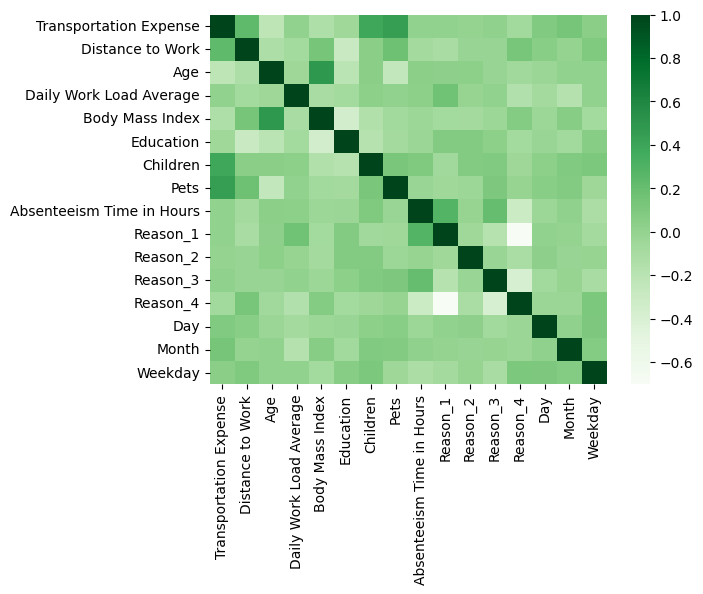

In [40]:
sns.heatmap(df.corr(), cbar=True, cmap='Greens', annot=False)

In [41]:
df['Weekday'].value_counts()

Weekday
2    154
1    141
0    141
4    132
3    119
6      9
5      4
Name: count, dtype: int64

Highest absenteeies are on Wednesday.

In [42]:
df['Daily Work Load Average'].unique()

array([239.554, 205.917, 241.476, 253.465, 306.345, 261.306, 308.593,
       302.585, 343.253, 326.452, 378.884, 377.55 , 275.312, 265.615,
       294.217, 265.017, 284.031, 236.629, 330.061, 251.818, 244.387,
       239.409, 246.074, 253.957, 230.29 , 249.797, 261.756, 284.853,
       268.519, 280.549, 313.532, 264.249, 222.196, 246.288, 237.656])

This is a numerical column and the average can be any number, so gonna keep it the same.

In [43]:
df.head()

,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_1,Reason_2,Reason_3,Reason_4,Day,Month,Weekday
0,289,36,33,239.554,30,1,2,1,4,0,0,0,1,7,7,1
1,118,13,50,239.554,31,1,1,0,0,0,0,0,0,14,7,1
2,179,51,38,239.554,31,1,0,0,2,0,0,0,1,15,7,2
3,279,5,39,239.554,24,1,2,0,4,1,0,0,0,16,7,3
4,289,36,33,239.554,30,1,2,1,2,0,0,0,1,23,7,3


In [44]:
df['Education'].unique()

array([1, 3, 2, 4])

In [45]:
df['Education'].value_counts()

Education
1    583
3     73
2     40
4      4
Name: count, dtype: int64

In [46]:
df['Education'] = df['Education'].map({1:0, 2:1, 3:1, 4:1})
df.head()

,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_1,Reason_2,Reason_3,Reason_4,Day,Month,Weekday
0,289,36,33,239.554,30,0,2,1,4,0,0,0,1,7,7,1
1,118,13,50,239.554,31,0,1,0,0,0,0,0,0,14,7,1
2,179,51,38,239.554,31,0,0,0,2,0,0,0,1,15,7,2
3,279,5,39,239.554,24,0,2,0,4,1,0,0,0,16,7,3
4,289,36,33,239.554,30,0,2,1,2,0,0,0,1,23,7,3


In [47]:
df.head()

,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_1,Reason_2,Reason_3,Reason_4,Day,Month,Weekday
0,289,36,33,239.554,30,0,2,1,4,0,0,0,1,7,7,1
1,118,13,50,239.554,31,0,1,0,0,0,0,0,0,14,7,1
2,179,51,38,239.554,31,0,0,0,2,0,0,0,1,15,7,2
3,279,5,39,239.554,24,0,2,0,4,1,0,0,0,16,7,3
4,289,36,33,239.554,30,0,2,1,2,0,0,0,1,23,7,3


In [48]:
df['Education'].value_counts()

Education
0    583
1    117
Name: count, dtype: int64

- 0: Education cateogry 1
- 1: Education cateogry 2, 3, 4

In [49]:
df['Children'].unique()

array([2, 1, 0, 4, 3])

In [50]:
df['Children'].value_counts()

Children
0    285
1    213
2    146
4     42
3     14
Name: count, dtype: int64

In [51]:
df['Children'] = df['Children'].map({0:0, 1:1, 2:2, 3:3, 4:3})
df['Children'].value_counts()

Children
0    285
1    213
2    146
3     56
Name: count, dtype: int64

- 3: More than 2 children.

In [52]:
df['Pets'].unique()

array([1, 0, 4, 2, 5, 8])

In [53]:
df['Pets'].value_counts()

Pets
0    439
1    132
2     92
4     29
5      5
8      3
Name: count, dtype: int64

In [54]:
df['Pets'] = df['Pets'].map({0:0, 1:1, 2:2, 4:3, 5:3, 8:3})

In [55]:
df['Pets'].value_counts()

Pets
0    439
1    132
2     92
3     37
Name: count, dtype: int64

- 3: More than 2 pets.

In [56]:
df.head()

,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_1,Reason_2,Reason_3,Reason_4,Day,Month,Weekday
0,289,36,33,239.554,30,0,2,1,4,0,0,0,1,7,7,1
1,118,13,50,239.554,31,0,1,0,0,0,0,0,0,14,7,1
2,179,51,38,239.554,31,0,0,0,2,0,0,0,1,15,7,2
3,279,5,39,239.554,24,0,2,0,4,1,0,0,0,16,7,3
4,289,36,33,239.554,30,0,2,1,2,0,0,0,1,23,7,3


<Axes: >

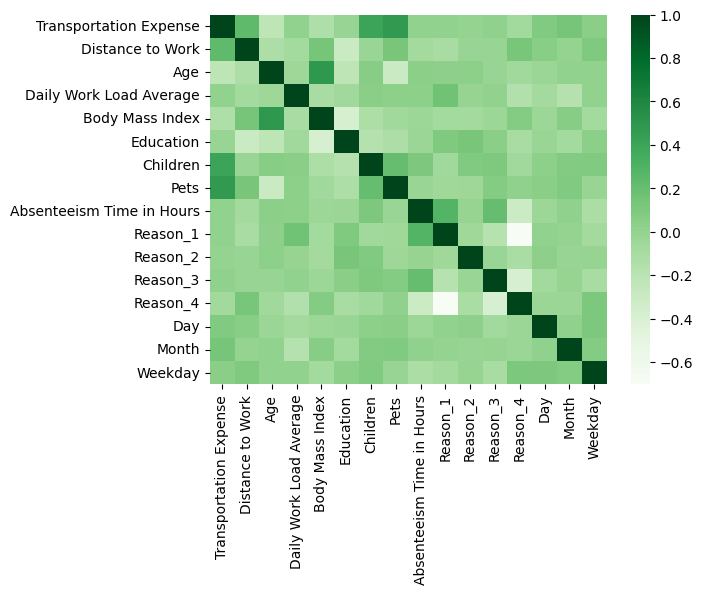

In [57]:
sns.heatmap(df.corr(), cmap="Greens", cbar=True)

In [58]:
df.to_csv('cleaned_n_encoded_data.csv', index=False)